In [1]:
import pandas as pd
import numpy as np
import random as ra
from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from time import time
from math import *

debut = time()
dataset = pd.read_csv('data.csv', sep=",")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
df_kMeans = dataset.drop([
"id",
"diagnosis",
"radius_mean",
"texture_mean",
"smoothness_mean",
"compactness_mean",
"concavity_mean",
"concave_points_mean",
"symmetry_mean",
"fractal_dimension_mean",
"radius_se",
"texture_se",
"perimeter_se",
"area_se",
"smoothness_se",
"compactness_se",
"concavity_se",
"concave_points_se",
"symmetry_se",
"fractal_dimension_se",
"radius_worst",
"texture_worst",
"perimeter_worst",
"area_worst",
"smoothness_worst",
"compactness_worst",
"concavity_worst",
"concave_points_worst",
"symmetry_worst",
"fractal_dimension_worst"
], axis=1).copy()

df = dataset.drop([
"id",
"diagnosis",
"radius_mean",
"texture_mean",
"smoothness_mean",
"compactness_mean",
"concavity_mean",
"concave_points_mean",
"symmetry_mean",
"fractal_dimension_mean",
"radius_se",
"texture_se",
"perimeter_se",
"area_se",
"smoothness_se",
"compactness_se",
"concavity_se",
"concave_points_se",
"symmetry_se",
"fractal_dimension_se",
"radius_worst",
"texture_worst",
"perimeter_worst",
"area_worst",
"smoothness_worst",
"compactness_worst",
"concavity_worst",
"concave_points_worst",
"symmetry_worst",
"fractal_dimension_worst"
], axis=1).to_numpy().copy()
# prendre 2 dimension pour l'analyse


df_kMeans = df_kMeans.iloc[:100]
# prendre u échentillon pour le test

NBvar = df.shape[1] # nbr colone
df_ech = [] # dataset échantillon
for i in range(0,100):
    df_ech.append(list(df[i]))
    
    
NBind = len(df_ech) # nombre d'individue
k = 0
Index = [] # l'index du tableau des distances
dist = [] # les distances entre les points

In [3]:
moy = [0 for i in range(NBvar)] # la moyenne
for i in df_ech:
    for k in range(NBvar):
        moy[k] += i[k]/NBind

def va(a, b):
    if ((a-b) > 0):
        return (a-b)
    else:
        return (-(a-b))
        
rest = [0 for i in range(NBvar)] # écart type
for i in df_ech:
    for k in range(NBvar):
        rest[k] += va(moy[k], i[k])/NBind
print(moy, rest)

# centrer les données
for i in range(NBind):
    for k in range(NBvar):
        df_ech[i][k] = (df_ech[i][k]-moy[k])/rest[k]

for i in range(df_kMeans.shape[0]):
    k = 0
    for x in df_kMeans:
        df_kMeans[x][i] = (df_kMeans[x][i]-moy[k])/rest[k]
        k += 1

[96.4712, 703.2929999999998] [18.588767999999998, 257.52959999999985]


In [4]:
while (k < NBind):
    for i in range(NBind):
        if ((k != i) and (Index.count([i,k]) < 1) and (Index.count([k,i]) < 1)):
            Index.append([k,i])
            #print(i)
            dist.append(distance.cityblock(df_ech[i],df_ech[k]))
    k += 1

# critére 01    
m = 0
for i in dist:
    m += i
m = int(m/len(dist))

def moyPt(Tab): # fonction qui calcule la moyenne des points (individues) dans un cluster
    t = [0 for i in range(NBvar)]
    for i in Tab:
        for k in range(NBvar):
            t[k] += i[k]/len(Tab)
    return t


In [5]:
#critére 02
m1 = (min(dist) + max(dist))/2

# critére 03
m2 = (m1 + m)/2


In [6]:
rest = df_ech.copy() # les individus non encore parcourue
k = 0 # l'indice des clusters
p1 = rest[ra.randint(0, len(rest)-1)]
Grp = {} # les groupes 
Grp[k] = [p1] # le premiér groupe aliatoire
rest.remove(p1) # éliminer le premier individue

# centre de gravité dynamique
d2 = m # le critére pour choisir le groupe
while(rest != []):
    S = len(rest)-1 # la taille du groupe
    p = rest[ra.randint(0,S)] # choisir un point aléatoire
    Bool = True 
    
    for i in range(len(Grp)):
        d1 = distance.cityblock(moyPt(Grp[i]),p)
        if (d1 < m):
            if (d2 > d1): # choisir le cluster le plus proche
                d2 = d1 
                I = i # index du groupe
                Bool = False 
    if (Bool): # si le point n'entre dans aucun cluster
        k += 1
        Grp[k] = [p] # nouveau cluster
        rest.remove(p) # supprimer le points parcourue
    else:
        Grp[I].append(p) # ajouter le point au cluster
        rest.remove(p)
        d2 = m
midle = time() # calculer le temps d'éxecution


In [7]:

Groupe = Grp.copy()
for i in Groupe:
    print("les élements du Groupe ", i+1, "sont")
    for k in Groupe[i]:
        print(k)    

les élements du Groupe  1 sont
[-1.7172305340515306, -1.5197981125276474]
[-1.3218304731115043, -1.2899216245433534]
[-1.2190802531937563, -1.1718769415243917]
[-2.0270950716045304, -1.783457124928552]
[-2.407970232346759, -1.9469334787146801]
[-1.956084448415301, -1.684827685827183]
[-2.0270950716045304, -1.758217307835682]
[-1.2443643387232546, -1.142754075648003]
[-2.266486945234886, -1.8591765762071624]
[-1.9437113852838444, -1.6673539663013497]
[-1.3272100657773556, -1.2006115025224282]
[-1.0162696096911856, -1.231675892790576]
[-1.8484925950982873, -1.587363161360869]
[-2.249272248704164, -1.8696608079226622]
[-1.1701259599345153, -1.069364453639504]
[-2.005038741674542, -1.71783360048709]
[-1.1905684120647477, -1.1287751000273365]
les élements du Groupe  2 sont
[1.3733454524796913, 1.4472394629588228]
[0.7331739252434588, 0.6453898891622568]
[1.4163821938064967, 1.1560108041949368]
[0.4103983652924174, 0.4442479621759997]
[1.3249291184870349, 1.4433564141753044]
[1.4647985277991

In [8]:
print('le nombre de groupe est')
for i in Grp:
    print("le groupe ",i," ", len(Grp[i]))
    

le nombre de groupe est
le groupe  0   17
le groupe  1   20
le groupe  2   47
le groupe  3   15
le groupe  4   1


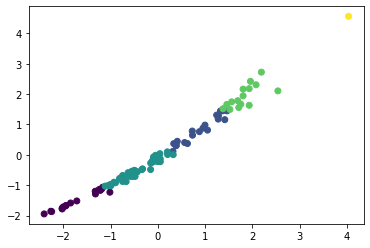

on à  5 Groupe
le groupe  1  à  17  éléments
le groupe  2  à  20  éléments
le groupe  3  à  47  éléments
le groupe  4  à  15  éléments
le groupe  5  à  1  éléments


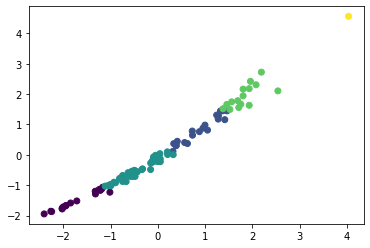

In [9]:
colone1 = []
colone2 = []
colone3 = []
for i in Grp:
    for x in Grp[i]:
        colone1.append(x[0])
        colone2.append(x[1])
        colone3.append(i)
plt.scatter(colone1, colone2, c=colone3)
plt.show()

print( "on à ", len(Grp), "Groupe")
som = 0
for i in Grp:
    print("le groupe ",i+1," à ", len(Grp[i])," éléments")
    som += len(Grp[i])
plt.scatter(colone1, colone2, c=colone3)
plt.show()

In [10]:
print("le temps d'éxécution est ", midle-debut)

le temps d'éxécution est  1.3090050220489502


In [11]:
g = {} # centre de gravité
for i in Grp:
    g[i] = [0 for u in range(NBvar)]
    for j in Grp[i]:
        for k in range(NBvar):
            g[i][k] += j[k]/len(Grp[0])
                     
Y = {}
V = {}
for i in Grp:
    Y[i] = []
    for x in Grp[i]:
        nk = len(Grp[i])
        a = (x[0] - g[0][0]) / nk
        b = (x[1] - g[0][1]) / nk
        Y[i].append([a,b])
    V[i] = np.dot(np.array(Y[i]).T, np.array(Y[i]))
    
W = np.zeros((2,2))
for i in g:
    W += V[i]*(len(Grp[i])/NBind)
W

gn = [0 for i in range(NBvar)]
for i in df:
    for k in range(NBvar):
        gn[k] += i[k]
        
S = {}
for i in g:
    a = (g[i][0] - gn[0]) * (len(Grp[i])/NBind)
    b = (g[i][0] - gn[1]) * (len(Grp[i])/NBind)
    S[i] = np.array([[a*a,a*b],[b*a, b*b]])

B = np.zeros((2,2))
for i in g:
    B += S[i]*(len(Grp[i])/NBind)

In [12]:
B # matrice inter groupe

array([[3.28935278e+08, 2.34223033e+09],
       [2.34223033e+09, 1.66781834e+10]])

In [13]:
sqrt(W[0][0]) + sqrt(W[1][1])

1.4817171486590142

In [14]:
# implémentation avec k-means
K = len(Grp)
ItemC = []



Len = [(len(Grp[u])-1) for u in Grp]
for i in Grp:
    ItemC.append(Grp[i][ra.randint(0, Len[i])])


def Fit():    
    s = []
    for i in Grp:
        s.append([0 for i in range(NBvar)]) 
        
    for j in Grp:    
        for i in Grp[j]:
            for x in range(NBvar):
                s[j][x] += (i[x] / len(Grp[j]))

    for i in Grp:
        Grp[i].clear()

    Dist = [0 for i in Grp]
    for i in range(NBind):
        for x in Grp:
            Dist[x] = distance.cityblock(s[x], df_ech[i])
        for x in Grp:  
            if (Dist[x] == min(Dist)):
                Grp[x].append(df_ech[i])

                
    L = []            
    for i in range(K):
        L.append(len(Grp[i]))
    return L

c = Fit()  
while (c != Fit()):
    c = Fit()
print(c)   
fin = time()

[19, 17, 41, 22, 1]


In [15]:
for i in Grp:
    print("les élements du Groupe ", i+1, "sont")
    for k in Grp[i]:
        print(k)

les élements du Groupe  1 sont
[-1.0162696096911856, -1.231675892790576]
[-1.9437113852838444, -1.6673539663013497]
[-1.3218304731115043, -1.2899216245433534]
[-2.407970232346759, -1.9469334787146801]
[-1.1701259599345153, -1.069364453639504]
[-1.1168679925425937, -1.0316988804393743]
[-1.2443643387232546, -1.142754075648003]
[-2.266486945234886, -1.8591765762071624]
[-1.7172305340515306, -1.5197981125276474]
[-2.249272248704164, -1.8696608079226622]
[-2.005038741674542, -1.71783360048709]
[-1.956084448415301, -1.684827685827183]
[-1.3272100657773556, -1.2006115025224282]
[-2.0270950716045304, -1.758217307835682]
[-2.0270950716045304, -1.783457124928552]
[-1.2190802531937563, -1.1718769415243917]
[-1.0501610434860447, -1.0095655023733192]
[-1.8484925950982873, -1.587363161360869]
[-1.1905684120647477, -1.1287751000273365]
les élements du Groupe  2 sont
[0.33508406797050816, 0.3669752913839816]
[0.38350040196316393, 0.3017400718208713]
[0.38887999462901507, 0.30834125475285296]
[0.62558

le groupe  1  à  19  éléments
le groupe  2  à  17  éléments
le groupe  3  à  41  éléments
le groupe  4  à  22  éléments
le groupe  5  à  1  éléments


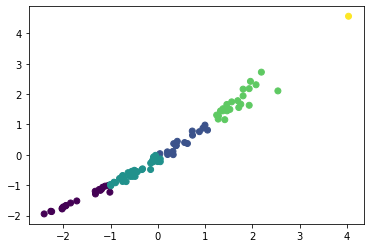

le temps d'éxécution est  1.916656494140625


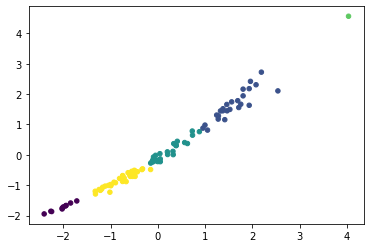

In [16]:
colone1 = []
colone2 = []
colone3 = []

for i in Grp:
    for x in Grp[i]:
        colone1.append(x[0])
        colone2.append(x[1])
        colone3.append(i)
        
for i in Grp:
    print("le groupe ",i+1," à ", len(Grp[i])," éléments")
    som += len(Grp[i])
plt.scatter(colone1, colone2, c=colone3)
plt.show()


model= KMeans(n_clusters=len(Grp))
model.fit(df_kMeans)
plt.scatter(df_kMeans.perimeter_mean, df_kMeans.area_mean, c=model.labels_, s=20)


print("le temps d'éxécution est ", fin-debut)

In [17]:
g = {}
for i in Grp:
    g[i] = [0 for u in range(NBvar)]
    for j in Grp[i]:
        for k in range(NBvar):
            g[i][k] += j[k]/len(Grp[0])
            
            
Y = {} # la dataset centré
V = {} # la varinace covariance des groupes
for i in Grp:
    Y[i] = []
    for x in Grp[i]:
        nk = len(Grp[i])
        a = (x[0] - g[0][0]) / nk
        b = (x[1] - g[0][1]) / nk
        Y[i].append([a,b])
    V[i] = np.dot(np.array(Y[i]).T, np.array(Y[i]))
    
W = np.zeros((2,2))
for i in g:
    W += V[i]*(len(Grp[i])/NBind)
W

gn = [0 for i in range(NBvar)]
for i in df:
    for k in range(NBvar):
        gn[k] += i[k]
        
S = {}
for i in g:
    a = (g[i][0] - gn[0]) * (len(Grp[i])/NBind)
    b = (g[i][0] - gn[1]) * (len(Grp[i])/NBind)
    S[i] = np.array([[a*a,a*b],[b*a, b*b]])

B = np.zeros((2,2))
for i in g:
    B += S[i]*(len(Grp[i])/NBind)

In [18]:
W

array([[0.49744339, 0.50291872],
       [0.50291872, 0.51224553]])

In [19]:
B

array([[2.50143110e+08, 1.78119014e+09],
       [1.78119014e+09, 1.26832928e+10]])

In [20]:
len(Grp[0])

19